# Exercice PCA

## Analyse en Composantes Principales
Durée : ~15min

## Principe
Il s’agit de résumer l’information qui est contenue dans une base de données en un certain nombre de variables synthétiques. 
Ces variables correspondent aux **Composantes Principales**.

## But
Le but d'une réduction de dimension est de réduire drastiquement le nombre de variables sans pour autant impacter les traitement des donnée une fois la réduction faite.

    
## Énoncé
Vous allez devoir effectuer une réduction de dimension sur un jeu de donnée automobiles.

In [97]:
import pandas
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn import preprocessing as prepro
import matplotlib.pyplot as plt
import numpy as np

In [98]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

In [99]:
csv = "Automobile_data.csv"

data = pandas.read_csv(csv)
data = data[data["normalized-losses"] != "?"]
data = data.dropna()
le = prepro.LabelEncoder()
le.fit(data["curb-weight"])
data["curb-weight"] = le.transform(data["curb-weight"])


In [105]:
features = ["highway-mpg", "engine-size", "horsepower", "curb-weight"]


X = data.copy()
X[features].corrwith(X["price"])
y = X.pop('price')
X = X.loc[:, features]


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [101]:
# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pandas.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,-2.740436,-1.637058,10.474677,-0.680827
1,43.910809,7.168854,2.980741,-5.258838
2,41.793650,10.928020,-0.295324,-2.881086
3,67.173226,7.169237,24.503178,-1.996220
4,1.153981,4.293230,11.678880,-1.144623


In [102]:
loadings = pandas.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4
highway-mpg,-0.096871,0.000033,-0.137652,0.985732
engine-size,0.514410,-0.352718,-0.779471,-0.058284
horsepower,0.502876,-0.609878,0.597907,0.132934
curb-weight,0.687833,0.709675,0.126427,0.085227


array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

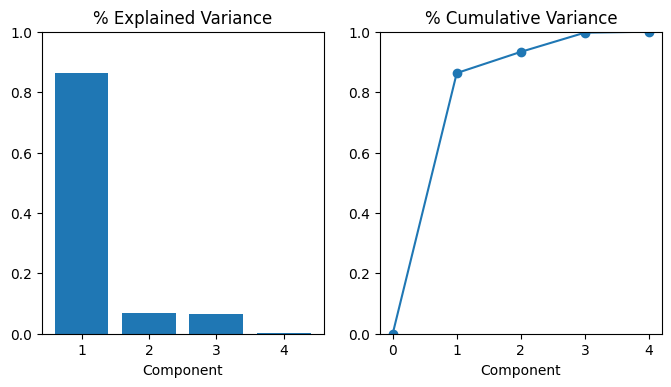

In [103]:
plot_variance(pca)

In [62]:
data = data[data["normalized-losses"] != "?"]
data = data.dropna()
le = prepro.LabelEncoder()


le.fit(data["make"])
data["make"] = le.transform(data["make"])

le.fit(data["fuel-type"])
data["fuel-type"] = le.transform(data["fuel-type"])

le.fit(data["aspiration"])
data["aspiration"] = le.transform(data["aspiration"])

le.fit(data["num-of-doors"])
data["num-of-doors"] = le.transform(data["num-of-doors"])

le.fit(data["body-style"])
data["body-style"] = le.transform(data["body-style"])

le.fit(data["drive-wheels"])
data["drive-wheels"] = le.transform(data["drive-wheels"])

le.fit(data["engine-location"])
data["engine-location"] = le.transform(data["engine-location"])

le.fit(data["fuel-system"])
data["fuel-system"] = le.transform(data["fuel-system"])

le.fit(data["curb-weight"])
data["curb-weight"] = le.transform(data["curb-weight"])

le.fit(data["engine-type"])
data["engine-type"] = le.transform(data["engine-type"])

le.fit(data["fuel-system"])
data["fuel-system"] = le.transform(data["fuel-system"])





data


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,0,1,0,1,3,1,0,99.8,...,109,5,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,0,1,0,1,3,0,0,99.4,...,136,5,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,0,1,0,1,3,1,0,105.8,...,136,5,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,0,1,1,1,3,1,0,105.8,...,131,5,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,1,1,0,2,3,2,0,101.2,...,108,5,3.5,2.8,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,17,1,0,1,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,17,1,1,1,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,17,1,0,1,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,17,0,1,1,3,2,0,109.1,...,145,3,3.01,3.4,23.0,106,4800,26,27,22470


In [85]:
data.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
symboling,1.000000,-0.522159,-0.334736,-0.208303,-0.516420,-0.232228,-0.169342,-0.141755,0.013028,0.078220
wheel-base,-0.522159,1.000000,0.871641,0.811949,0.558956,0.782289,0.650577,0.295342,-0.535380,-0.572540
length,-0.334736,0.871641,1.000000,0.837930,0.496802,0.884363,0.716208,0.190043,-0.683543,-0.690581
width,-0.208303,0.811949,0.837930,1.000000,0.283885,0.833274,0.756317,0.261152,-0.644124,-0.674959
height,-0.516420,0.558956,0.496802,0.283885,1.000000,0.366291,0.174557,0.236149,-0.112150,-0.146788
curb-weight,-0.232228,0.782289,0.884363,0.833274,0.366291,1.000000,0.803821,0.168550,-0.775350,-0.790290
engine-size,-0.169342,0.650577,0.716208,0.756317,0.174557,0.803821,1.000000,0.146519,-0.599425,-0.625054
compression-ratio,-0.141755,0.295342,0.190043,0.261152,0.236149,0.168550,0.146519,1.000000,0.278269,0.223595
city-mpg,0.013028,-0.535380,-0.683543,-0.644124,-0.112150,-0.775350,-0.599425,0.278269,1.000000,0.972996
highway-mpg,0.078220,-0.572540,-0.690581,-0.674959,-0.146788,-0.790290,-0.625054,0.223595,0.972996,1.000000


In [64]:
pca = PCA()
pca_data = pca.fit_transform(data)
pca.head(5)

ValueError: could not convert string to float: 'four'